#Instalação auto arima

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 27.0 MB/s 
     |████████████████████████████████| 9.8 MB 38.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# **Regressão Linear**

**Introdução/Objetivo**

##**Tema: Produtividade dos funcionários**

A indústria têxtil é um símbolo da globalização e um setor chave na economia atual. Ela ainda envolve muitos processos de manufatura, então para suprir a demanda global a produtividade dos funcionários necessita manter uma boa taxa. Sendo assim, é muito importante para os gestores dessa área entenderem como isso se dá em uma linha de produção e quais fatores afetam a produtividade geral de um setor. Desse modo, o dataset abaixo contém registros a respeito da produtivdade dos funcionários de acordo com diversas features, como o departamento, número de trabalhadores, entre outros.

## **Objetivo**
Nessa fase, o nosso objetivo principal será criar um modelo de regressão linear que consiga prever a produtividade dos funcionários nessa fábrica específica.

## **Análise exploratória**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Vemos que o dataset possui um pouco mais de mil registros, então é bem difícil que ele já esteja sumarizado.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


- Como podemos observar na análise estatística, os valores da variável de produtividade real não se distanciam muito entre si. O máximo é 1.12, que representa uma produtividade de 112%. Esse valor não se dispara muito da média, que fica em torno de 73%.
- Além disso, vemos que o setor com mais trabalhadores possui 89 ao todo, enquanto o menor setor possui apenas dois. A média fica em torno de 34.
- Outro dado a ser reparado é o incentivo financeiro aos funcionários. Ele possui uma média de 38 unidades da moeda local para cada um, sendo que o seu valor máximo é 3600. Isso nos parece bem discrepante em um momento inicial. Mas pode estar relacionado com o setor de produção de algum funcionário.
- Vemos que a média do tempo de hora extra total de cada é bem alta, cerca de 4500 minutos. O que mostra que nessa indústria em específico é bem rígida a respeito de metas de produção.

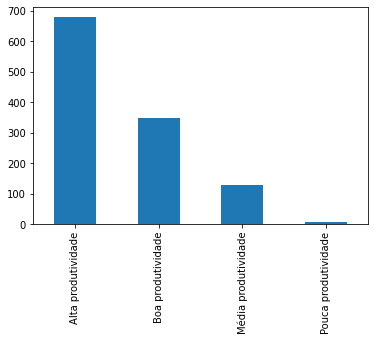

In [ ]:
Categorias = ['Pouca produtividade','Média produtividade','Boa produtividade','Alta produtividade']
Intervalos = [0,0.25,0.50,0.75,1]
faixas = pd.cut(df['actual_productivity'], bins = Intervalos, labels = Categorias)
faixas.value_counts().plot.bar()

Nesse gráfico pode-se observar que grande parte dos registros apontaram uma produtividade boa ou alta. Isso evidencia o que já foi citado anteriormente. A indústria que coletou esses dados parece ser bem rígida ao seguir certos padrões. Certamente isso se deve pelo modelo que se tem hoje por causa da globalização: os ritmos de produção tendem a ser cada vez mais acelerados dado o crescimento elevado do consumo. Muitas vezes esses produtos são descartados rapidamente para que uma nova tendência de consumo seja gerada, então as empresas tem que se adequar e procurar sempre aumentar o nível de produtividade para se manterem competitivas.

In [ ]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

Contabilizando o número de departamentos diferentes, vemos que há um erro na base de dados em que o espaço diferencia duas colunas iguais. Para analisar essa coluna, vamos arrumar isso.

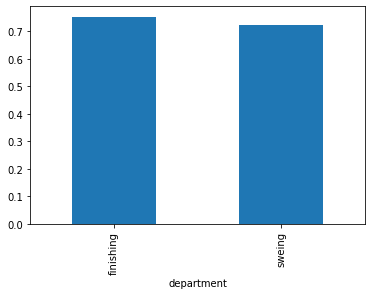

In [ ]:
df['department'] = df['department'].str.replace(' ','')
medias_dep = df.groupby('department').mean()['actual_productivity']
medias_dep.plot.bar()

Olhando a produtividade em cada departamento, vemos que a diferença é muito pequena para ser considerado algo relevante. Mesmo assim, ainda é possível observar que a produtividade do setor de acabamento é um pouco maior, possivelmente por causa que o setor de costura envolve mais trabalho e consome mais tempo na maioria das linhas de produção pelo mundo. Apesar do uso de tecnologias como a máquina de costura, a parte de acabamento também dispõe dessa tecnologia e mais outras, como máquinas de colocar zíper por exemplo.

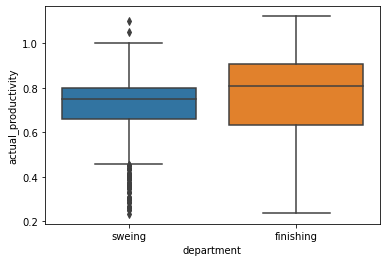

In [ ]:
import seaborn as sns
sns.boxplot(x='department', y='actual_productivity',data=df)

Para não restar mais dúvidas, o boxplot revela que de fato o departamento de acabamento possui uma diferença na produtividade. Vemos que o departamento de costura possui muito mais outliers inferiores do que superiores. O departamento de acabamento possui a maioria dos seus registros de produtividade nos segundo e terceiro quartis, tendo um limite superior maior do que o de costura. Enquanto a maioria dos dados de produtividade do setor se costura se localiza entre 0.6 e 0.8, os valores do setor de acabamento se concentram nessa mesma faixa só que com uma proporção maior de registros como também uma tendência ao limite superior.

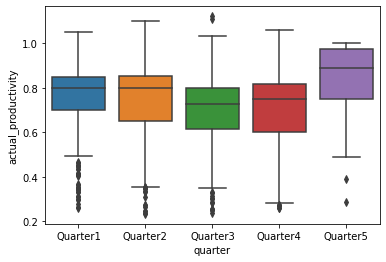

In [ ]:
import seaborn as sns
sns.boxplot(x='quarter', y='actual_productivity',data=df)

O gráfico de boxplot revela que a produtividade geral de uma equipe tende a aumentar mais nos últimos dias do mês como mostra a quantidade de dados no segundo e terceiro quartis. Enquanto isso a produtividade tende a diminuir um pouco durante a segunda e terceira semana.

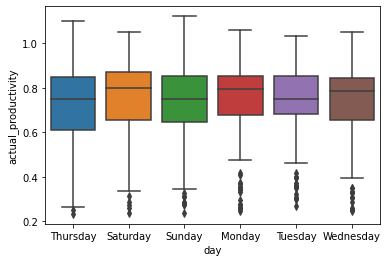

In [ ]:
sns.boxplot(x='day', y='actual_productivity',data=df)

Durante os dias da semana vemos que as variações de produtividade são pequenas, mas não irrelevantes. No geral, pode-se observar que:

- Quarta feira e quinta feira possuem produtividades um pouco menores em relação aos outros dias
- Sábado parece ter uma produtividade um pouco maior do que nos outros dias

- Há muitos outliers inferiores, principalmente na segunda feira. Isso pode estar relacionado com as condições de trabalho e as metas a serem batidas no dia.

## **Projeção/Regressão**#

In [ ]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


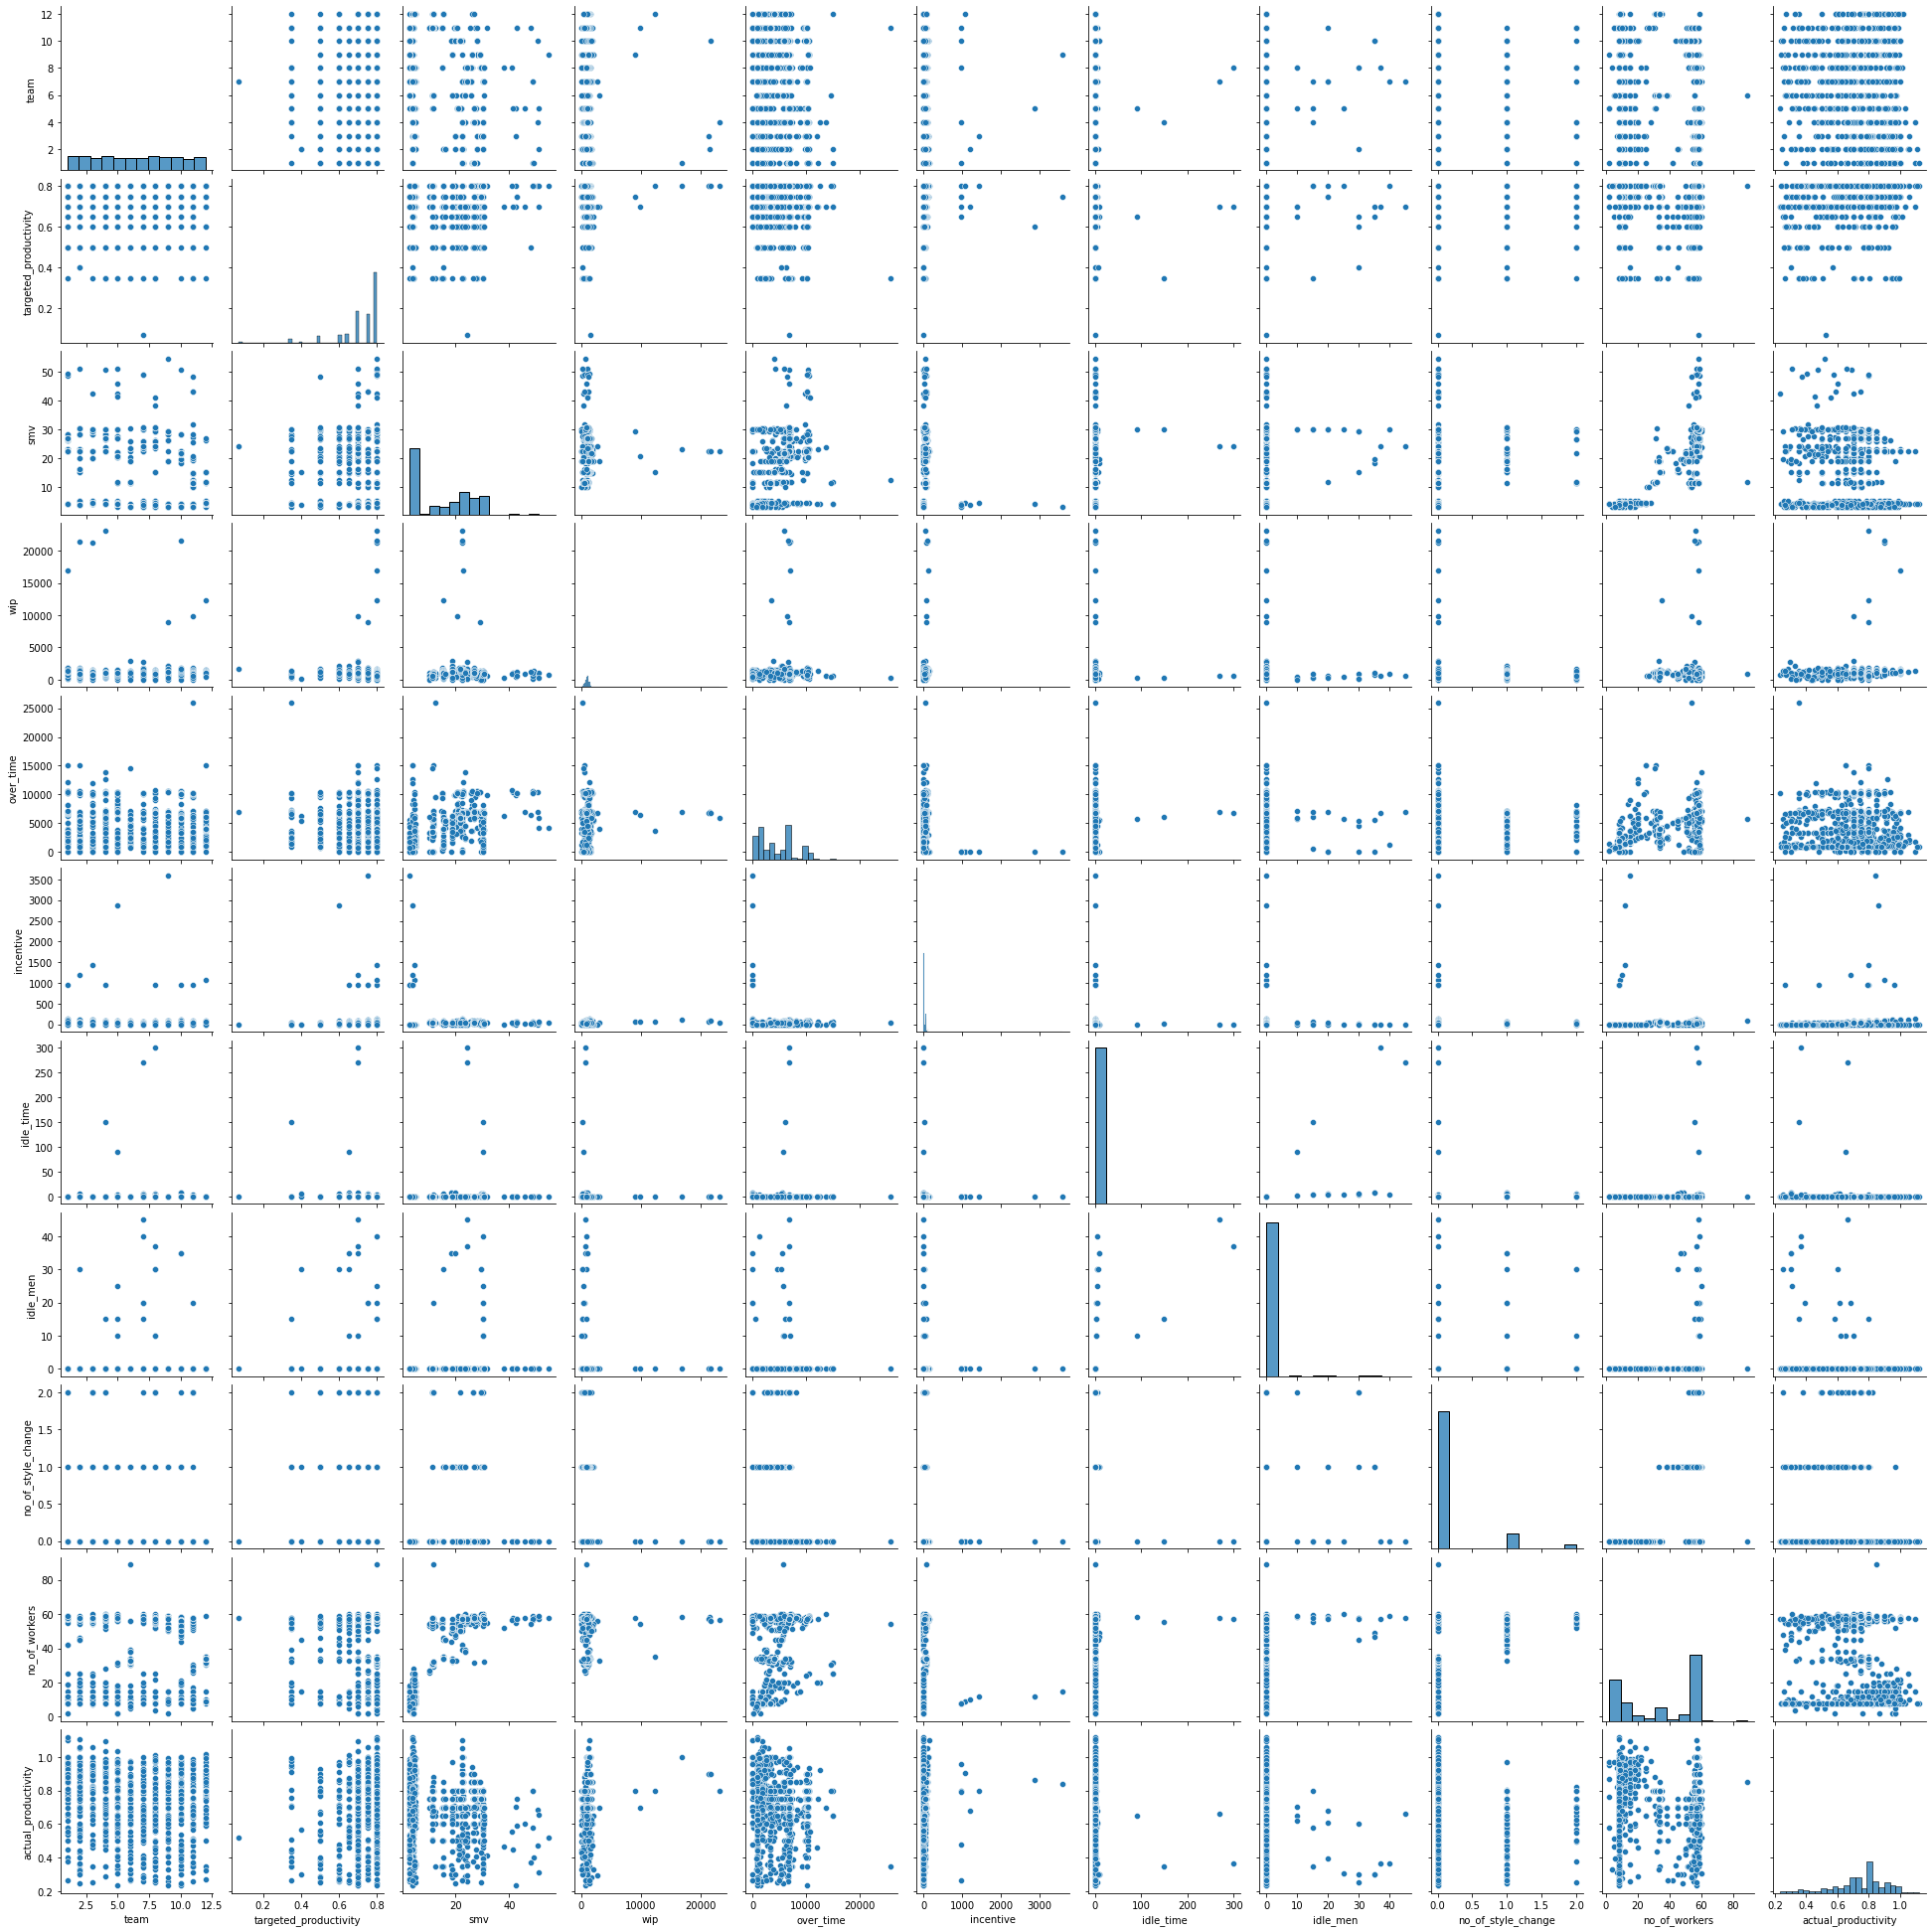

In [ ]:
sns.pairplot(df)

Dentre todas as relações apontadas com a produtividade real, vemos que as relações mais aparentes são a de produtividade alvo, incentivo, tempo alocado para uma tarefa em minutos e número de mudanças no estilo de cada peça.Analisando especificamente vemos:

- Produtividade alvo: A principal relação de regressão, é notável que os funcionários geralmente cumprem a estimativa da empresa.

- incentivo: apesar de ser uma relação menor, a produtividade dos funcionarios não apresentou uma queda quando foram fornecidos auxílios financeiros, mas sim aumentaram um pouco

- tempo alocado por tarefa: Quanto maior o tempo, menor a produtividade

- mudança no estilo: Quanto mais mudanças no stilo de uma peça durante a produção, menor é a produtividade, pois o tempo consumido é maior e é necessário uma adaptação no acabamento.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


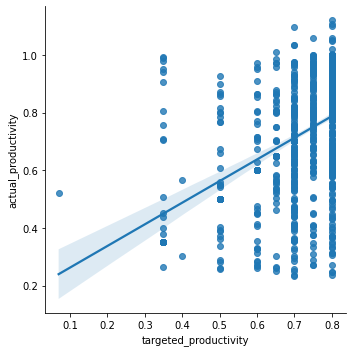

In [ ]:
sns.lmplot('targeted_productivity','actual_productivity',data=df)

Vendo mais detalhadamente, vemos que a produtividade alvo acompanha a produtividade real, mostrando que os funcionários se esforçam muito para bater as metas estabelecidas pelos seus superiores.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


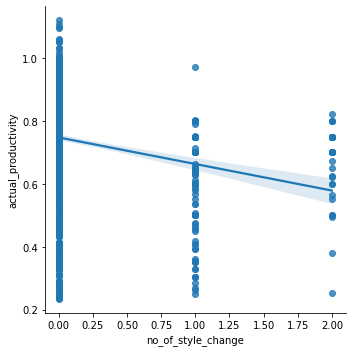

In [ ]:
sns.lmplot('no_of_style_change','actual_productivity',data=df)

Como dito anteriormente, o número de vezes que é necessário uma mudança no estilo da peça durante a produção é inversamente proporcional à produtividade. São poucos os registros com uma produtividade muito alta em que o número de mudanças foi maior que 1.

In [ ]:
df = df.dropna()
df['quarter'] = df['quarter'].replace({'Quarter1':1,'Quarter2':2,'Quarter3':3,'Quarter4':4,'Quarter5':5})
df['quarter'] = df['quarter'].astype(int)
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(df, train_size=0.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Transformando a coluna 'quarter' em valores númericos, é possível dividir os valores em 80% treino e 20% teste para aplicá-los na regressão linear e fazer previsões.

In [ ]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(treino[['quarter','team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']] ,treino['actual_productivity'])
print(rl.coef_,rl.intercept_)

[-6.71623849e-03 -2.63878930e-03  5.96838293e-01 -3.51233883e-03
 -4.57722336e-07 -1.63009806e-06  3.21272954e-03  7.49105551e-04
 -7.04240013e-03  6.92589458e-03  1.10929189e-03] 0.2169508637151416


Criado o modelo de regressão linear, realizei o fit com as features e obtive os coeficientes de cada uma. Esse coeficientes poderão ser usados posteriormente para criar uma função que prevê a produtividade com valores novos. Essa função é resultado da multiplicação de cada coeficiente por um valor novo somado com 0.2169. Sendo assim, o valor de produtividade mínimo é este mesmo número. Após isso, vamos ver a acurácia de treino.

In [ ]:
rl.score(treino[['quarter','team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']] , treino['actual_productivity'] )

0.8062791226436674

Com uma acurácia de 82% no r1, vemos que o modelo previu bem a produtividade dos funcionários por uma regressão linear, sendo um resultado bem aceitável dado o contexto do negócio.

In [ ]:
from sklearn import metrics
produtividade_prev = rl.predict(teste[['quarter','team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']])
metrics.r2_score(teste['actual_productivity'],produtividade_prev)

0.7918568489094995

Realizando agora a acurácia em teste do r1, vemos que a acurácia abaixou para 72%. Contudo, esse ainda pode ser considerado um resultado aceitável pois o objetivo aqui é tentar encontrar fatores que afetam a produtividade, não ter uma acurácia que beira a perfeição.

In [ ]:
df.head(1)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725


In [ ]:
def prever_produtividade(q,team,target,smv,wip,ot,ic,idl_tm,idl_men,nosc,now):
  return q * -4.15250314e-03 + team * -3.48894359e-03 + target * 7.24034650e-01 + smv * -3.20455770e-03 + wip * -1.95169073e-07  + ot * -2.94656936e-06 + ic * 2.89668661e-03 + idl_tm * 8.34381336e-04  + idl_men * -6.66061732e-03  + nosc * 1.05811570e-02 + now * 1.18540731e-03 + 0.13531324895387864

print(prever_produtividade(1,1,0.6,15,500,3500,120,0,0,0,40))

0.8986323350273787


Usando a função que prevê a produtividade de um setor específico, vemos que esse registro com novos dados possui uma produtividade bem alta (89%)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Produtividade - Real'),
 Text(0.5, 0, 'Produtividade - Previsão')]

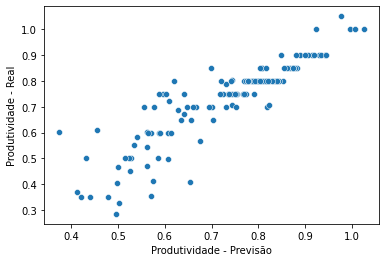

In [ ]:
ax = sns.scatterplot(rl.predict(teste[['quarter','team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']]),teste['actual_productivity'])
ax.set(xlabel='Produtividade - Previsão', ylabel='Produtividade - Real')

Vemos nesse gráfico que a produtividade prevista segue uma diagonal em comparação a produtividade real segue uma linha reta, apesar de apresentar uma leve dispersão, podemos ver que o algoritmo teve uma precisão aceitável como um todo.

# **Classificação/Agrupamento**

##**Introdução/Objetivo**

###**Tema: Classificação de asteroides possivelmente perigosos**

A Nasa sempre monitora por meio do sistema de objetos mais próximos à terra se há algum deles que possa oferecer risco ao nosso planeta. Apesar da grande maioria das vezes a chance de um impacto direto serem muito pequenas, esse monitoramento é essencial, e os objetos que forem potencialmente perigosos devem ser classificados com a maior antecedência possível. Desse modo, a base de dados usada contém diversos registros de asteroides detectados por sistemas de monitoramento, possuindo diversas características observadas e uma característica de classificação (perigoso ou não)


###**Objetivo**

O objetivo nesta fase será criar um modelo de classificação que consiga diferenciar com uma alta eficiência asteroides perigosos dos seguros. É muito importante que essa classificação ocorra com o menor número de erros possível para que ela seja viável em um contexto real.

###**Colunas**

- Name: Identificação do asteroide

- Absolute magnitude(km): Luminosidade aparente do objeto na distância de 10gigaparsec

- Est Dia in KM (min): Diâmetro mínimo estimado

- Est Dia in KM (max): Diâmetro máximo estimado

- Close Approach Date: Data de aproximação da terra

- Epoch Date close Approach: Época da aproximação da terra

- Relative Velocity km per sec: Velocidade relativa à terra em quilômetros por segundo

- Miss dist. (Astronomical): Distância estimada até a Terra em unidades astronômicas

- Orbiting Body: Corpo celeste que o asteroide está orbitando

- Orbit Uncertainity: grau de incerteza da estabilidade da órbita      

- Minimum Orbit Intersection: Distância mínima entre a órbita do asteroide e a da Terra

- Jupiter Tisserand Invariant : Constante de tisserand do asteroide em relação ao planeta júpiter
       
- Eccentricity: Formato da órbita do asteroide
  - 0: circular
  - entre 0 e 1: elíptica
  - 1 órbita de escape (parábola)              

- Inclination: Inclinação do asteroide         

- Orbital Period: Período orbital           

- Perihelion Distance: Distância mínima até o sol         

- Perihelion Arg: Posição da distância mínima até o sol          

- Aphelion Dist: Distância no ponto mais longe do sol

- Perihelion Time: Tempo até chegada na distância mínima até o sol  

- Mean Anomaly: Anomalia de movimento de rotação do corpo      

- Mean Motion: Média do movimento de rotação do corpo celeste      

- Equinox: Equinócio         

- Hazardous: Se o asteroide é perigoso ou não (1 = sim, 0 = não)

## **Análise exploratória**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Nasa.csv')
df

,Unnamed: 0,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,0,3703080,3703080,21.600,0.127220,0.284472,1995-01-01,788947200000,6.115834,0.419483,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,1,3723955,3723955,21.300,0.146068,0.326618,1995-01-01,788947200000,18.113985,0.383014,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2,2446862,2446862,20.300,0.231502,0.517654,1995-01-08,789552000000,7.590711,0.050956,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3,3092506,3092506,27.400,0.008801,0.019681,1995-01-15,790156800000,11.173874,0.285322,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,4,3514799,3514799,21.600,0.127220,0.284472,1995-01-15,790156800000,9.840831,0.407832,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,4682,3759007,3759007,23.900,0.044112,0.098637,2016-09-08,1473318000000,22.154265,0.041361,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,4683,3759295,3759295,28.200,0.006089,0.013616,2016-09-08,1473318000000,3.225150,0.006469,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,4684,3759714,3759714,22.700,0.076658,0.171412,2016-09-08,1473318000000,7.191642,0.061009,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,4685,3759720,3759720,21.800,0.116026,0.259442,2016-09-08,1473318000000,11.352090,0.260760,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


O dataset possui 4687 registros, então ele é bom para se trabalhar pois aparenta não estar sumarizado.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4687 non-null   int64  
 1   Neo Reference ID              4687 non-null   int64  
 2   Name                          4687 non-null   int64  
 3   Absolute Magnitude            4687 non-null   float64
 4   Est Dia in KM(min)            4687 non-null   float64
 5   Est Dia in KM(max)            4687 non-null   float64
 6   Close Approach Date           4687 non-null   object 
 7   Epoch Date Close Approach     4687 non-null   int64  
 8   Relative Velocity km per sec  4687 non-null   float64
 9   Miss Dist.(Astronomical)      4687 non-null   float64
 10  Orbiting Body                 4687 non-null   object 
 11  Orbit ID                      4687 non-null   int64  
 12  Orbit Determination Date      4687 non-null   object 
 13  Orb

De início, vemos que muitas colunas possuem os mesmos valores porém com diferentes unidades de medida. Sendo assim, essas colunas repetidas não serão necessária na análise. Logo as removeremos.

In [ ]:
df.describe(include='all')

,Unnamed: 0,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
count,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687,4.687000e+03,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687,4687
unique,NaN,NaN,NaN,NaN,NaN,NaN,777,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J2000,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4687,3932
mean,2343.000000,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,NaN,1.179881e+12,13.970811,0.256778,...,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,NaN,NaN
std,1353.164686,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,NaN,1.981540e+11,7.293223,0.145798,...,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,NaN,NaN
min,0.000000,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,NaN,7.889472e+11,0.335504,0.000178,...,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,NaN,NaN
25%,1171.500000,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,NaN,1.015574e+12,8.432865,0.133420,...,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,NaN,NaN
50%,2343.000000,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,NaN,1.203062e+12,12.917889,0.265029,...,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,NaN,NaN
75%,3514.500000,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,NaN,1.355558e+12,18.077649,0.384154,...,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,NaN,NaN


O número de registros de asteroides considerados perigosos é igual ao número de linhas dos outros registros. Desse modo, podemos ver que a base de dados é coerente. Vemos que o maior asteroide registrado tem 34km de diâmetro, o que se encaixa em uma das descrições da base de dados: os registros são feitos de objetos relativamente pequenos se comparados com outros corpos celestes. No geral, temos a maior velocidade encontrada como 44 quilômetros por segundo , o que é perfeitamente possível em uma escala astronômica. Além disso, também vemos que a velocidade média de deslocamento de todos os asteroides fica em torno de 13km por segundo, o que não é muito destoante.

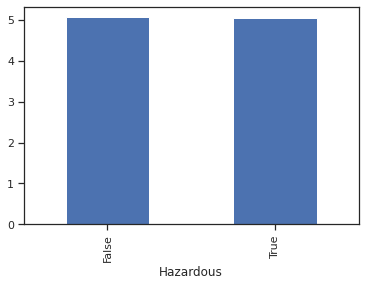

In [ ]:
df.groupby('Hazardous')['Jupiter Tisserand Invariant'].mean().plot.bar()

Cruzando a label com a variável da constante de tisserand de acordo com cada objeto, vemos que não há diferença quase alguma entre os objetos classificados perigosos e seguros, logo podemos concluir que essa medida só poderia ser relevante se combinada com algum outro fator.

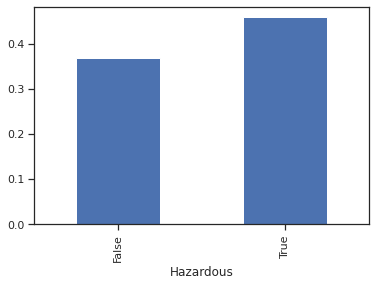

In [ ]:
df.groupby('Hazardous')['Eccentricity'].mean().plot.bar()

A excentridade média de corpos considerados perigosos é relativamente maior do que a excentridade média de corpos considerados relativamente seguros. A excentridade orbital mede a curva de uma órbita de algum corpo. Desse modo, faz sentido que aqueles corpos considerados menos perigosos tenham uma excentridade média menor, pois a sua órbita já está bem definida como cirular/elíptica. Enquanto corpos com uma excentridade maior estão em órbita de escape e esta pode ser influenciada pela gravidade de algum planeta, por exemplo.

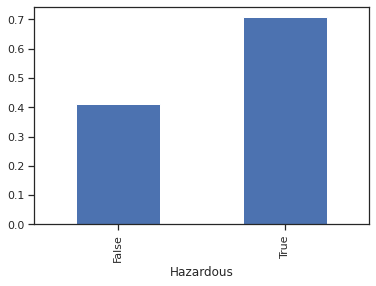

In [ ]:
df.groupby('Hazardous')['Est Dia in KM(max)'].mean().plot.bar()

Aqui vemos que o diâmetro médio de corpos considerados perigosos é maior do que aqueles considerados seguros. No contexto do negócio isso faz muito sentido, pois se algum objeto menor entrar em rota de colisão com a terra, existe uma boa chance dele ser desintegrado ao entrar na atmosfera e não causar um desastre. Em contrapartida, objetos maiores apresentam não só um risco maior de não serem desintegrados como também de um impacto e destruição maior.

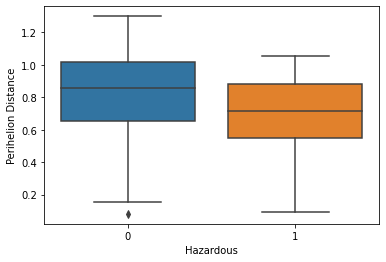

In [ ]:
sns.boxplot(x='Hazardous', y='Perihelion Distance',data=df)

Vemos que a distância até o sol apresenta um fator que reduz o risco de um possível impacto. Isso faz sentido, pois quanto maior a distância do objeto até o sol, menor o risco de sua órbita conflituar com a da Terra e haver um risco de colisão.

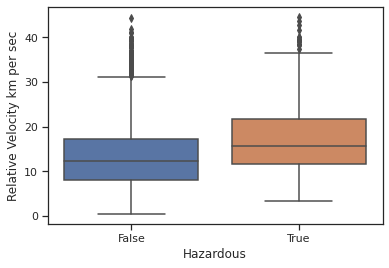

In [ ]:
sns.boxplot(x='Hazardous', y='Relative Velocity km per sec',data=df)

Corpos com uma velocidade relativa maior apresentam maior risco no geral, o que faz total sentido. Quando um corpo entra em rota de colisão com a terra em uma velocidade muito baixa, a sua entrada na atmosfera demora mais e ele tem mais chances de ser desintegrado se comparado com aqueles com maior velocidade. Além disso vemos que os dois casos possuem muitos outliers superiores, mostrando que existem alguns objetos com velocidade altíssima que não apresentam risco de colisão (possivelmente por causa de sua órbita).

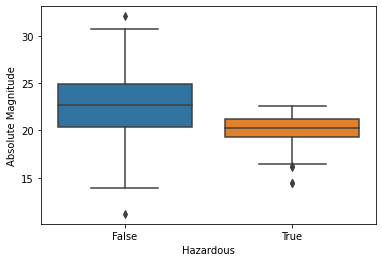

In [ ]:
sns.boxplot(x='Hazardous', y='Absolute Magnitude',data=df)

Aqui vemos que a magnitude absoluta de corpos considerados seguros é maior do que corpos considerados pergigosos. Isso se deve pois a magnitude é uma medida da luminosidade, e quanto mais brilhante é aquele corpo, menor a sua magnitude absoluta. Sendo assim, corpos muito brilhantes indicam que eles estão cada vez mais perto do sistema solar ou da Terra, então representam um risco maior do que aqueles com menos brilho.

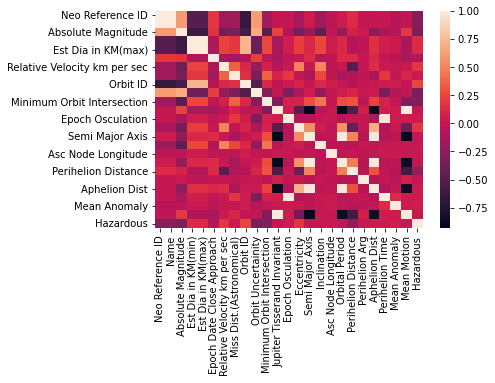

In [ ]:
import seaborn as sns
df['Hazardous'] = df['Hazardous'].astype(int)
df = df.drop('Unnamed: 0',axis=1)
sns.heatmap(df.corr())

Após analisar a matriz de correlação, vemos que as medidas que apresentam uma correlção um pouco maior com o fato do asteroide ser potencialmente perigoso dizem respeito à diâmetro, velocidade e excentridade. Como dito durante toda a análise exploratória, essas medidas são importantes mas não funcionam tão bem sozinhas para fazer uma classificação.
Tratando-se de correlações negativas, temos a incerteza da órbita, e a intersecção mínima da órbita e a distância do sol até o asteroide. Em relação a intersecção mínima da órbita, quanto maior ela é menor o risco oferecido. E quanto maior a distância do asteroide até o sol menor o risco de ele cair em rota de colisão com a Terra também.

## **Preparação dos dados**

In [ ]:
import numpy as np
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float32
 3   Est Dia in KM(min)            4687 non-null   float32
 4   Est Dia in KM(max)            4687 non-null   float32
 5   Est Dia in M(min)             4687 non-null   float32
 6   Est Dia in M(max)             4687 non-null   float32
 7   Est Dia in Miles(min)         4687 non-null   float32
 8   Est Dia in Miles(max)         4687 non-null   float32
 9   Est Dia in Feet(min)          4687 non-null   float32
 10  Est Dia in Feet(max)          4687 non-null   float32
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Transformando os números que estavam em float64 em float32 para que os cálculos do modelo não fiquem muito pesados. Isso reduzirá a precisão, mas é necessário.

##**Árvore de decisão**

In [ ]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(df, train_size=0.8)
df = df.dropna()

Dividindo a base em 80% para treino e 20% para teste.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(treino[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec','Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']],treino['Hazardous'])
acrr_treino = tree.score(treino[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']],treino['Hazardous'])
acrr_treino*100

99.51987196585756

Criei o modelo da árvore de decisão e realizei o fit com as features mais relevantes. Feito isso, vemos que a acurácia de treino chegou em 99.5%, o que no nosso contexto é o ideal. Queremos o menor número possível de classificações equivocadas, e o modelo em treino se mostrou ter uma alta confiabilidade.

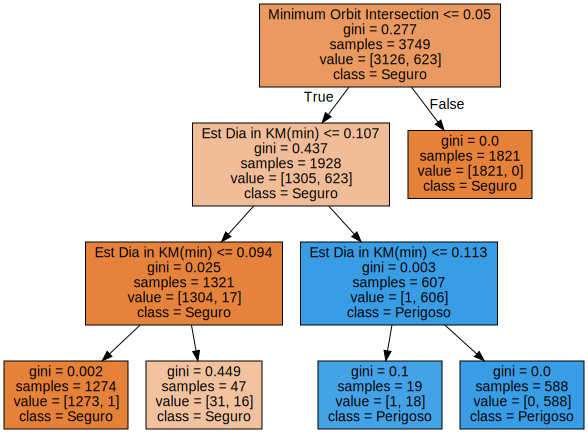

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(tree,filled=True,feature_names = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'], class_names = ['Seguro','Perigoso'])
Source (dot_data)

Analisando as regras geradas pela árvore de decisão, vemos que se a distância mínima de intersecção com a Terra for maior que 0.05, o asteroide é considerado seguro. Caso contrário, temos o ramo mais à esquerda, em que se a distância da intersecção for menor que 0.05 e o diâmetro mínimo estimado for maior que 0.107, o corpo já é classificado perigoso. Caso contrário, ele é considerado seguro. As regras posteriores a essas duas parecem ser redundantes pois não apresentaram mudanças na classificação do modelo.

In [ ]:
prev_teste = tree.predict(teste[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']])
y_teste = pd.factorize(teste['Hazardous'])[0]
prev_teste

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,

Fazendo as previsões de teste

In [ ]:
from sklearn.metrics import accuracy_score
acuracia_Teste = accuracy_score(prev_teste, y_teste)
acuracia_Teste*100

99.57356076759062

A acurácia em teste se manteve praticamente igual à de treino, o que é perfeito para o nosso caso. Não houve alguma associação errada de features e a árvore de decisão conseguiu classificar muito bem os registros. Vamos verificar os erros e acertos agora.

[[806   0]
 [  4 128]]


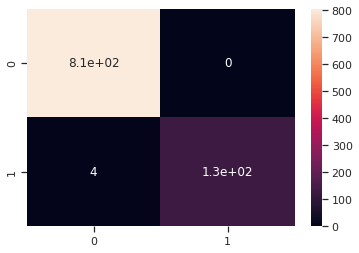

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste,prev_teste)
print(cm)
sns.heatmap(cm,annot=True)

O modelo não detectou nenhum falso positivo e apenas 4 falsos negativos. No nosso caso, o falso negativo é bem mais prejudicial, pois o descobrimento tardio de um corpo perigoso para o nosso planeta significaria um possível desastre. O resto dos apontamentos foram corretos. Vemos que o modelo apontou 806 corpos considerados seguros e 128 considerados perigosos. Com uma alta precisão, esse modelo poderia ser usado em muitas estações de monitoramento que captam esses dados de asteroides, e fariam muita diferença na agilidade do processo de classificação, com uma alta confiabilidade.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,prev_teste))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       785
           1       0.99      0.98      0.98       153

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



Aqui vemos que 100% dos casos negativos foram acertados e o modelo obteve uma precisão de 99% dos casos positivos. Isso evidencia ainda mais que a árvore de decisão conseguiu classificar bem asteroides seguros de perigosos e poderia ser usada em uma estação de monitoramento.

## **Agrupamento**

In [ ]:
from sklearn.cluster import KMeans
base_kmeans = df.drop(columns=['Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox'],axis=1)
treino_kmeans, teste_kmeans = train_test_split(base_kmeans, train_size=0.8)
treino_kmeans = treino_kmeans.drop(columns = ['Hazardous'],axis=1)
kmeans=KMeans(n_clusters=2)
kmeans.fit(treino_kmeans)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

Para a etapa de clusterização, iremos remover colunas que possuam valores que não sejam números, além da própria label de classificação. O objetivo aqui é fazer agrupamentos que sejam semelhantes às classificações feitas pela árvore de decisão. Sendo assim, realizamos a separação de 80% treino e 20% teste e realizamos o fit no modelo.

In [ ]:
kmeans.score(treino_kmeans)*-1**0.5

3.5938367736021645e+25

Como o modelo é de aprendizado não supervisionado, o score aqui não importa muito. Vemos que ele deu um valor extremamente alto por estarmos tratando de unidades de medida astronômicas aqui, então isso é esperado.

In [ ]:
treino_kmeans['clusters'] = kmeans.labels_
sns.set(style="ticks")
dfGraficos = treino_kmeans.sort_values(by=['clusters'], ascending=False)

Transformando os agrupamentos em uma coluna, basta verificar nos gráficos para correlacionar as dimensões com os agrupamentos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


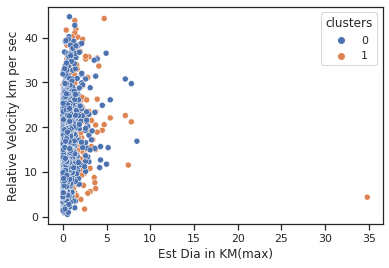

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Relative Velocity km per sec"],hue=dfGraficos['clusters'])

Nesse primeiro gráfico, temos que o diâmetro máximo em KM tende a ser um fator de risco pois o gráfico apresenta mais agrupamentos positivos para a direita. Por outro lado, a velocidade relativa não pareceu ser um fator decisivo para o agrupamento.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


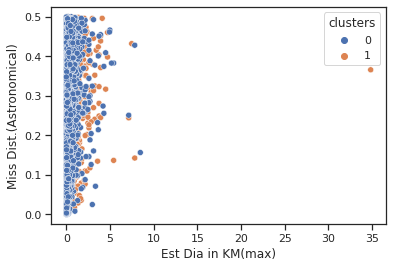

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Miss Dist.(Astronomical)"],hue=dfGraficos['clusters'])

A distância estimada também não pareceu ser um fator decisivo quando comparada com o diâmetro máximo estimado do asteroide, seguimos com a mesma conclusão até aqui.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


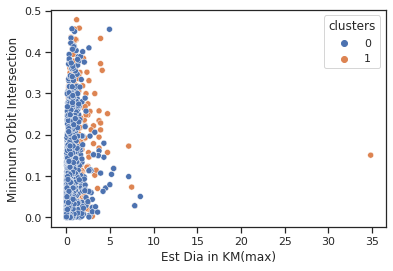

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Minimum Orbit Intersection"],hue=dfGraficos['clusters'])

Nesse caso, a distância mínima de intersecção de órbita não se mostrou um fator decisivo para o agrupamento, diferente do modelo da árvore de decisão.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


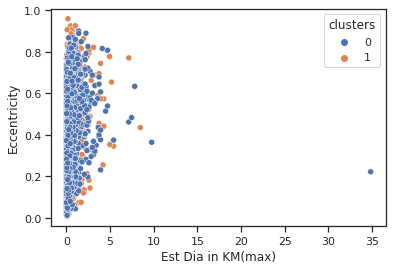

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Eccentricity"],hue=dfGraficos['clusters'])

Como também podemos ver, a Excentridade pareceu não ser um fator decisivo para o agrupamento nesse caso.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


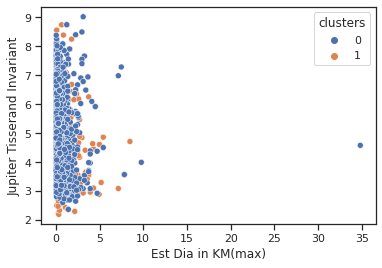

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Jupiter Tisserand Invariant"],hue=dfGraficos['clusters'])

Aqui vemos que a constante de tisserand do objeto em relação ao planeta júpiter não se mostrou relevante, então seguimos com a tese de que o diâmetro máximo em KM foi o fator mais decisivo para este agrupamento.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


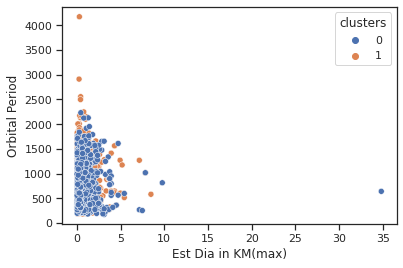

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Orbital Period"],hue=dfGraficos['clusters'])

O período orbital também não se mostrou mais relevante que o diâmetro máximo em KM do asteroide.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


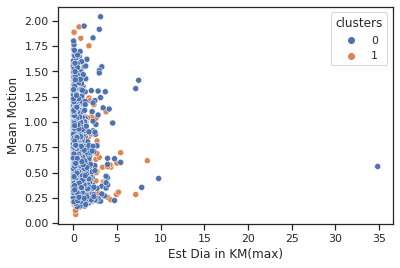

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Mean Motion"],hue=dfGraficos['clusters'])

A relação do número de órbitas do asteroide com a classificação dos clusters não se mostrou relevante nesse caso também.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


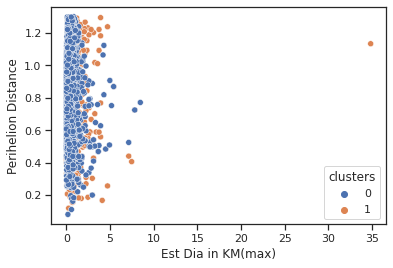

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Perihelion Distance"],hue=dfGraficos['clusters'])

No caso da distância do asteróide até o sol, vemos que os agrupamentos parecem se manter semelhantes aos gráficos anteriores então julgamos que esse não foi um fator relevante para o algoritmo de agrupamento.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


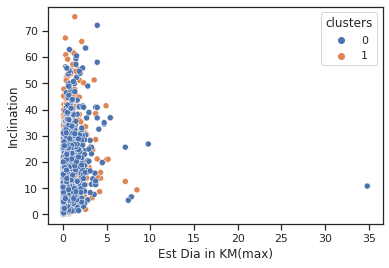

In [ ]:
sns.scatterplot(dfGraficos['Est Dia in KM(max)'],dfGraficos["Inclination"],hue=dfGraficos['clusters'])

Após analisar todos os gráficos e esse último, vemos que de fato o diâmetro parece ser o principal fator de risco segundo os agrupamentos feitos pelo KMeans. Até então, esses resultados diferem do que foi visto na análise exploratória e na árvore de decisão. Então por enquanto podemos concluir que as dimensões sozinhas não são algo decisivo, mas sim o conjunto delas. Agora irei fazer o teste porém com a coluna de classificação que havia sido removida para o treino e comparar os resultados.

In [ ]:
kmeansteste=KMeans(n_clusters=2)
kmeansteste.fit(teste_kmeans)
kmeansteste.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [ ]:
kmeansteste.score(teste_kmeans)*-1**0.5

9.077580334624182e+24

O score já foi nitidamente diferente do que visto em treino, então nesse caso os agrupamentos já foram um pouco diferentes. Vemos que o valor mudou de 3 para 9 com o decréscimo de 1 casa decimal. Como a escala das variáveis trabalhadas é muito grande, isso é esperado de acontecer, mas no entanto é algo que chama a atenção. Vou analisar agora os gráficos das dimensões mais relevantes no treino, pois são muitas e analisar todas as features do dataset seria inviável.

In [ ]:
dfGraficos2 = teste_kmeans.sort_values(by=['Hazardous'], ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


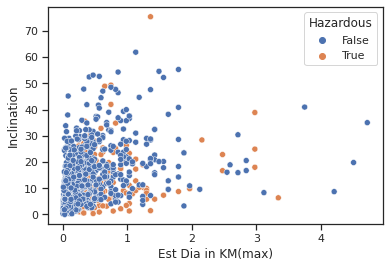

In [ ]:
sns.scatterplot(dfGraficos2['Est Dia in KM(max)'],dfGraficos2["Inclination"],hue=dfGraficos2['Hazardous'])

Como é possível observar, os agrupamentos do cluster foram nitidamente diferentes das classificações reais. Vemos que a maioria dos valores negativos ainda possui um diâmetro máximo relativamente menor, mas existem agora muito mais negativos com um diâmetro máximo maior também.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


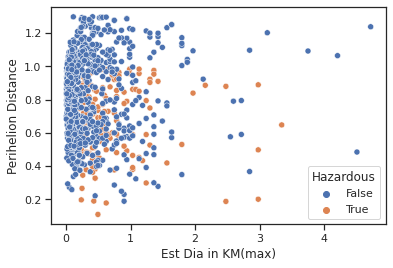

In [ ]:
sns.scatterplot(dfGraficos2['Est Dia in KM(max)'],dfGraficos2["Perihelion Distance"],hue=dfGraficos2['Hazardous'])

A distância até o sol também se mostrou diferente. Vemos que quanto maior a distância até o sol, menor o risco daquele corpo celeste ser perigoso é menor, e conforme essa distância diminui o risco aumenta.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


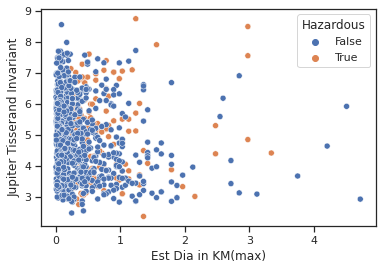

In [ ]:
sns.scatterplot(dfGraficos2['Est Dia in KM(max)'],dfGraficos2["Jupiter Tisserand Invariant"],hue=dfGraficos2['Hazardous'])

Por outro lado, não houve muitas mudanças em relação à constante de tisserand do asteroide em relação a jupiter, então nesse caso o KMeans desempenhou bem.

**Conclusão**

Infelizmente o agrupamento pelo KMeans não se comprovou na hora do teste, vimos que existem diferenças notáveis se compararmos os gráficos. Por ser um modelo não-supervisionado, não há controle dos agrupamentos que ele faz, então esse cenário é possível. De qualquer forma pode-se inferir que o modelo da árvore de decisão se mostrou mais eficiente do que o agrupamento nessa etapa.

# **Série temporal/ARIMA**

A base de dados contém registros temporais acerca dos valores de ativos da apple na bolsa de valores entre os anos de 2006 e 2017. O objetivo nesta etapa será criar uma série temporal que consiga prever o valor de um ativo em um futuro próximo.

## **Análise exploratória**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AAPL_Stocks.csv')
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


A dataframe possui 3019 linhas, então podemos concluir que ela não está sumarizada e poderemos prosseguir para a análise exploratória.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [ ]:
df['Ano'] = [x.split('-')[0] for x in df['Date']]
df['Mes'] = [x.split('-')[1] for x in df['Date']]

Aqui criei colunas especificamente para o ano e o mês, exclusivamente para usa-las na análise exploratória.

In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close,Volume,Name,Ano
count,3019,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3019,3019
unique,3019,NaN,NaN,NaN,NaN,NaN,1,12
top,2006-01-03,NaN,NaN,NaN,NaN,NaN,AAPL,2008
freq,1,NaN,NaN,NaN,NaN,NaN,3019,253
mean,NaN,64.673309,65.256833,64.033445,64.662892,1.311457e+08,NaN,NaN
std,NaN,44.524927,44.811772,44.230829,44.536448,1.018560e+08,NaN,NaN
min,NaN,7.390000,7.560000,7.170000,7.240000,1.147592e+07,NaN,NaN
25%,NaN,23.425000,23.805000,23.015000,23.420000,5.292889e+07,NaN,NaN
50%,NaN,57.860000,58.460000,57.320000,57.920000,1.066271e+08,NaN,NaN
75%,NaN,99.165000,100.275000,98.385000,99.480000,1.798977e+08,NaN,NaN


Vemos que nesse caso os valores estão padronizados. O volume de transações parece se manter em um nível parecido, chegando ao valor máximo de 8 * 10^8, mas no geral as casas decimais não estão muito diferentes uma das outras. O valor mínimo nessa coluna é 1.3 * 10^7, que pode se referir ao momento atual em que as ações da apple estão mais caras então o número de movimentações é menor.
Outro fator a ser observado é o valor de entrada, em que a média ficou em torno de 64 dólares ao longo do tempo. Os valores de fechamento também se manteram em uma média parecida, de 64.03 dólares.

Ano
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Volume, dtype: object

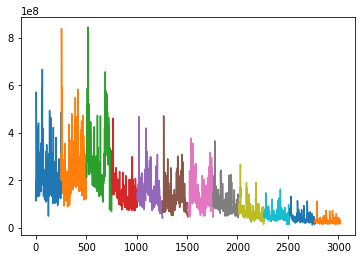

In [ ]:
df.groupby('Ano')['Volume'].plot()

Analisando o volume de transações de acordo com o ano, vemos que ao passar do tempo esse número foi diminuindo gradativamente, muito por causa da alta valorização dos ativos que pode significar uma diminuição da acessibilidade dos mesmos como também um desejo dos investidores de mantê-los para maximizar os seus ganhos com dividendos.

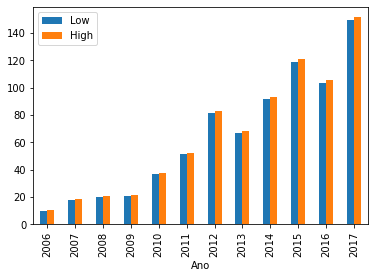

In [ ]:
df.groupby('Ano')[['Low','High']].mean().plot.bar()

Aqui vemos como que as ações da Apple valorizaram muito com o passar do tempo. Aqui temos os valores de abertura e fechamento médios ao longo dos anos, em que podemos perceber que o maior crescimento foi entre 2016 e 2017. Além disso, vemos uma queda expressiva dos anos de 2012 para 2013 e de 2015 para 2016. Apesar disso, os valores parecem manter um crescimento contínuo.

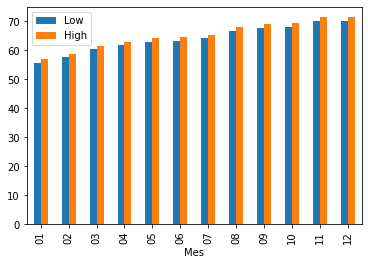

In [ ]:
df.groupby('Mes')[['Low','High']].mean().plot.bar()

Esse gráfico mostra os valores de abertura e fechamento do ativo da apple de acordo com os meses do ano. Aqui é possível ver um breve aumento gradual conforme o passar do ano. Sendo que depois de agosto esse valor cresce significativamente. Esse fenômeno observado no gráfico pode ser justificado pois durante esse período de tempo registrado no dataset, a Apple costumava lançar o novo aparelho iphone entre setembro e outubro, então faz sentido que as ações valorizem nessa parte do ano.

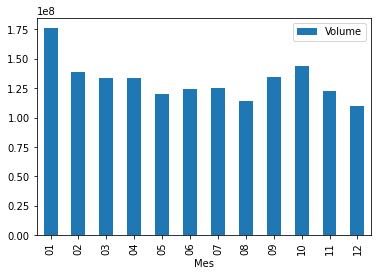

In [ ]:
df.groupby('Mes')[['Volume']].mean().plot.bar()

Aqui vemos que o volume de transações conforme os meses do ano também indicam o fenômeno dito anteriormente. Vemos que em janeiro o volume de transações é alto, mas tem uma queda gradativa até setembro, em que os volumes voltam a crescer por causa do lançamento dos aparelhos Iphone.

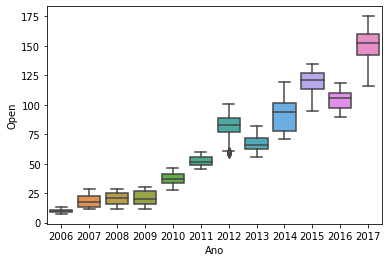

In [ ]:
import seaborn as sns
sns.boxplot(x='Ano', y='Open',data=df)

Esse boxplot revela mais uma vez como as ações da apple valorizaram com o passar dos anos. No geral vemos uma grande presença de outliers inferiores no ano de 2012, no qual a apple sofreu com uma desvalorização anormal durante um tempo. Apesar disso, os valores em 2017 apresentaram a maior alta no período em que os dados foram registrados.

## **Modelo Arima**

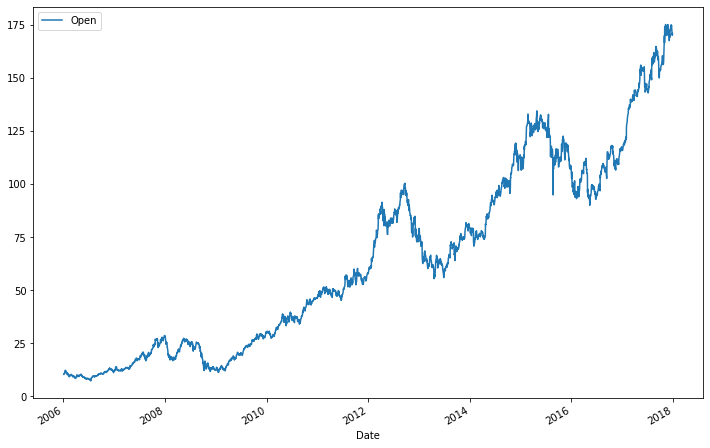

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df['Date']
df = df.drop(columns=['Date','Name','High','Low','Close','Volume','Ano','Mes'])
df.plot(figsize=(12,8))

Neste modelo avaliarei apenas o valor de entrada, então antes de tudo transformei o valor da data no índice e removi os valores que não serão avaliados. Feito isso, foi criado o gráfico da série temporal. Vemos nele novamente o crescimento dos valores conforme o tempo, então a base não parece ser estacionária. Contudo, é possível observar uma certa sazonalidade por causa das flutuações do mercado financeiro.

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Open'])

(0.5896876859354206,
 0.9873586709688073,
 22,
 2996,
 {'1%': -3.4325345499510043,
  '10%': -2.5672837975912697,
  '5%': -2.8625051928165557},
 9994.341022964352)

Aqui percebemos que de fato a série não é estacionária, com uam probabilidade muito alta de ser estacionária (98%). Desse modo, precisamos fazer a diferenciação das colunas para que a série temporal consiga ser analisada de maneira eficiente pelo modelo de arima.

In [ ]:
opendiff = df.diff().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(opendiff['Open'])

(-11.09840052495093,
 3.9208431129606355e-20,
 21,
 2996,
 {'1%': -3.4325345499510043,
  '10%': -2.5672837975912697,
  '5%': -2.8625051928165557},
 9990.286410089859)

Feita a diferenciação, vemos que agora sim a série tem uma alta probabilidade de ser estacionária, com o valor de p tendendo a 0. Desse modo, vamos dividir um período para o treino e fazer o fit no modelo.

In [ ]:
treino = opendiff.loc['01-03-2006':'01-03-2017']
teste = opendiff.loc['02-03-2017':]

In [ ]:
from pmdarima.arima import auto_arima
arr = auto_arima(treino,trace = True,m=10)
arr.fit(treino)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[10] intercept   : AIC=9003.043, Time=8.02 sec
 ARIMA(0,0,0)(0,0,0)[10] intercept   : AIC=9065.005, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[10] intercept   : AIC=9000.111, Time=0.86 sec
 ARIMA(0,0,1)(0,0,1)[10] intercept   : AIC=9003.907, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[10]             : AIC=9065.603, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[10] intercept   : AIC=9000.683, Time=0.17 sec
 ARIMA(1,0,0)(2,0,0)[10] intercept   : AIC=8996.732, Time=2.38 sec
 ARIMA(1,0,0)(2,0,1)[10] intercept   : AIC=8998.558, Time=8.91 sec
 ARIMA(1,0,0)(1,0,1)[10] intercept   : AIC=8999.405, Time=5.03 sec
 ARIMA(0,0,0)(2,0,0)[10] intercept   : AIC=9060.070, Time=2.05 sec
 ARIMA(2,0,0)(2,0,0)[10] intercept   : AIC=8997.518, Time=3.86 sec
 ARIMA(1,0,1)(2,0,0)[10] intercept   : AIC=8997.163, Time=7.20 sec
 ARIMA(0,0,1)(2,0,0)[10] intercept   : AIC=9000.284, Time=2.82 sec
 ARIMA(2,0,1)(2,0,0)[10] intercept   : AIC=8997.064, Time=17.91 sec
 ARIMA(1,0,0)(2,0,

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 0, 10),
      suppress_warnings=True)

Nesse caso, utilizei o auto arima para facilitar o trabalho. Feito o fit com o período de treino, vemos que o melhor modelo arima encontrado foi um com autoregrssão 1 (com valor de m = 10). Nesse caso, agora é possível realizar as predições em um futuro próximo.

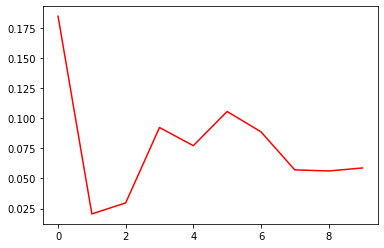

In [ ]:
import matplotlib.pyplot as plt
future = arr.predict()
plt.plot(future,color='red')

**Conclusão**

A previsão do valor de abertura das ações em um futuro próximo revela uma breve queda nos valores, seguido de uma breve subida e uma tendência à estagnação. Desse modo, podemos concluir que o modelo conseguiu fazer as previsões dos valores e poderia ser utilizado por investidores para determinar quando comprar ou vender ações, tornando os seus lucros maiores. O modelo beneficiaria muito aqueles que projetam os seus ganhos em renda variável.